## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import dataset 

In [2]:
df = pd.read_csv('Live.csv')
df.shape

(7050, 16)

#### Preview the dataset

In [3]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


### View summary of data set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

### Check for missing values in dataset

In [5]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

We can see that there are 4 redundant columns in the dataset. We should drop them before proceeding further.

### Drop redundant columns

In [6]:
df.drop(['Column1','Column2','Column3','Column4'],axis = 1,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


### View the statistical summary of the nurmical variabels

In [7]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


### Explore 'status_id' variable

In [8]:
# view the labels in the variable
print(df['status_id'].unique())
# view how many different types of variables are there
print('-'*100)
print(len(df['status_id'].unique()))

['246675545449582_1649696485147474' '246675545449582_1649426988507757'
 '246675545449582_1648730588577397' ...
 '1050855161656896_1060126464063099' '1050855161656896_1058663487542730'
 '1050855161656896_1050858841656528']
----------------------------------------------------------------------------------------------------
6997


We can see that there are 6997 unique labels in the status_id variable. The total number of instances in the dataset is 7050. So, it is approximately a unique identifier for each of the instances. Thus this is not a variable that we can use. Hence, I will drop it

### Explore 'status_published' variable

In [9]:
# view the labels in the variable
print(df['status_published'].unique())
# view how many different types of variables are there
print('-'*100)
print(len(df['status_published'].unique()))

['4/22/2018 6:00' '4/21/2018 22:45' '4/21/2018 6:17' ... '9/21/2016 23:03'
 '9/20/2016 0:43' '9/10/2016 10:30']
----------------------------------------------------------------------------------------------------
6913


Again, we can see that there are 6913 unique labels in the status_published variable. The total number of instances in the dataset is 7050. So, it is also a approximately a unique identifier for each of the instances. Thus this is not a variable that we can use. Hence, I will drop it also.

### Explore 'status_type' variable

In [10]:
# view the labels in the variable
print(df['status_type'].unique())
# view how many different types of variables are there
print('-'*100)
print(len(df['status_type'].unique()))

['video' 'photo' 'link' 'status']
----------------------------------------------------------------------------------------------------
4


We can see that there are 4 categories of labels in the status_type variable.

#### Drop 'status_id' and 'status_published' variable from the dataset

In [11]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

### View the summary of dataset again

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


#### Preview the dataset again

In [13]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


We can see that there is 1 non-numeric column status_type in the dataset. I will convert it into integer equivalents.

### Declare feature vector and target variable

In [14]:
X = df
y = df['status_type']

### Convert categorical variable into integers

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

#### View the summary of X

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


#### Preview the dataset X

In [17]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


## Feature Scaling

In [18]:
cols = X.columns

In [19]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [20]:
X = pd.DataFrame(X, columns = [cols])
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


## K-Means model with two clusters

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans = kmeans.fit(X)

#### K-Means model parameters study

In [22]:
centroids2 = kmeans.cluster_centers_

In [23]:
inertia2 = kmeans.inertia_

The lesser the model inertia, the better the model fit.

We can see that the model has very high inertia. So, this is not a good model fit to the data.

### Check quality of weak classification by the model

In [24]:
labels2 = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels2 = sum(y == labels2)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels2, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels2/float(y.size)))

Result: 63 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


We have achieved a weak classification accuracy of 1% by our unsupervised model.

## Use elbow method to find optimal number of clusters

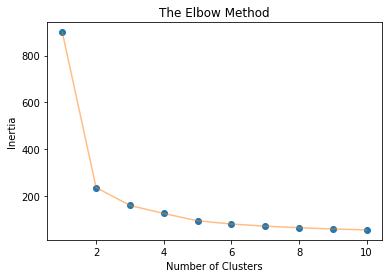

In [25]:
from sklearn.cluster import KMeans
inertia = []
for n in range(1,11):
    kmeans = KMeans(n_clusters = n,
                    init = 'k-means++',
                    n_init = 10,
                    max_iter = 300,
                    tol = 0.0001,
                    random_state = 0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
    
plt.plot(np.arange(1,11),inertia,'o')
plt.plot(np.arange(1,11),inertia,'-',alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

#### K-Means model with 3 clusters

In [26]:
kmeans = KMeans(n_clusters = 3,
               init = 'k-means++',
               n_init = 10,
               max_iter = 300,
               tol = 0.0001,
               random_state = 0)
kmeans = kmeans.fit(X)
# check how many of the samples were correctly labeled
labels3 = kmeans.labels_
correct_labels3 = sum(y == labels3)
print("Result: %d out of %d samples were correctly labeled."%(correct_labels3,y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels3/float(y.size)))

Result: 138 out of 7050 samples were correctly labeled.
Accuracy score: 0.02


### K-Means model with 4 clusters

In [27]:
kmeans = KMeans(n_clusters = 4,
               init = 'k-means++',
               n_init = 10,
               max_iter = 300,
               tol = 0.0001,
               random_state = 0)
kmeans = kmeans.fit(X)
# check how many of the samples were correctly labeled
labels4 = kmeans.labels_
correct_labels4 = sum(y == labels4)
print("Result: %d out of %d samples were correctly labeled."%(correct_labels4,y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels4/float(y.size)))

Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


We have achieved a relatively high accuracy of 62% with k=4.